# Show avg syllable duration across age

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from aging.plotting import (
    format_plots,
    save_factory,
    figure,
    PLOT_CONFIG,
    COLORMAPS,
    PlotConfig
)

In [2]:
format_plots()
c = PlotConfig()
saver = save_factory(PLOT_CONFIG.save_path / "fig2-panels", tight_layout=False)

In [3]:
from matplotlib.colors import LinearSegmentedColormap
# Define the color map
colors = ['#d94801','white','#008C8D']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cmmf=custom_cmap

colors = ['#dadaeb','#6a51a3']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cma=custom_cmap

colors = ['white','gray']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cma=custom_cmap

colors = ['#ccece6','#99d8c9','#66c2a4','#41ae76','#238b45','#006d2c']
cml = sns.blend_palette(colors, n_colors=256, as_cmap=True)

# Define the color map
colors = ['#fee6ce','#d94801']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cmf=custom_cmap

colors = ['#c7eae5','#008C8D']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cmm=custom_cmap

## Males

In [4]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/ontogeny_males_syllable_df_v00.parquet')
keep_syllables = np.loadtxt('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/to_keep_syllables_raw.txt', dtype=int)

In [5]:
df['idx'] = np.arange(len(df))
df.loc[df['onsets'], 'dur'] = df.query('onsets')['idx'].diff()
df['dur'] = df['dur'].ffill()
df = df.drop(columns=['idx'])

In [6]:
durs = df.groupby(['age', 'mouse'])['dur'].mean() / 30

In [7]:
durs_all = df.groupby(['age', 'mouse','syllables'])['dur'].mean() / 30
durs_all = durs_all.unstack('syllables')
durs_all = durs_all[keep_syllables]

In [8]:
durs = pd.DataFrame(durs_all.mean(axis=1), columns=['dur'])

<Axes: xlabel='age-mouse', ylabel='syllables'>

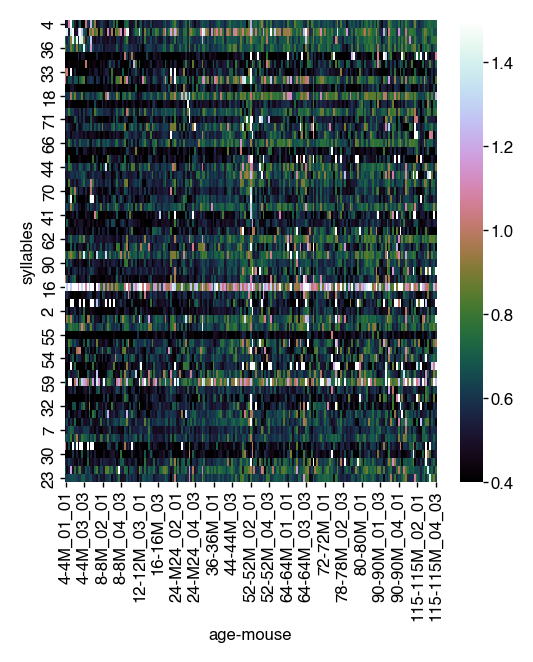

In [9]:
# sort syllable order by the average
syll_sort_m = (
    durs_all.rolling(5, center=True, win_type="exponential")
    .mean(tau=1.5)
    .idxmax()
    .sort_values()
    .index
)


sns.heatmap(durs_all[syll_sort_m].T, vmin=0.4, vmax=1.5, cmap='cubehelix')

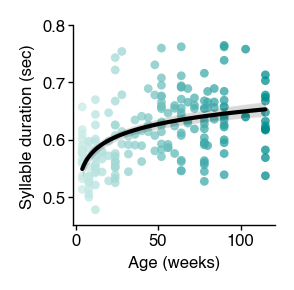

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(1.3,1.3) 
plt.scatter(data=durs.reset_index(),
            x='age', 
            y='dur', 
            s=10, 
            c='age', 
            edgecolor='none',
            linewidth=0.25,
            alpha=0.75,
            cmap=cmm)

ax = sns.regplot(
    data=durs.reset_index(),
    x="age",
    y="dur",
    #color=COLORMAPS.ont_male(255),
    color='black',
    #scatter_kws=dict(linewidths=0),
    scatter=False,
    logx=True,
)
ax.set(xlabel="Age (weeks)", ylabel="Syllable duration (sec)", ylim=[0.45,0.8])
sns.despine()

In [11]:
c = PlotConfig()
fig.savefig(c.dana_save_path / "fig1"/ 'syll_duration_male_log.pdf')

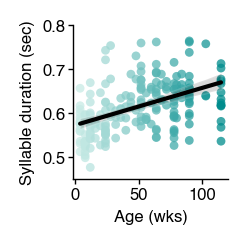

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(1,1) 
plt.scatter(data=durs.reset_index(),
            x='age', 
            y='dur', 
            s=10, 
            c='age', 
            edgecolor='none',
            linewidth=0.25,
            alpha=0.75,
            cmap=cmm)

ax = sns.regplot(
    data=durs.reset_index(),
    x="age",
    y="dur",
    #color=COLORMAPS.ont_male(255),
    color='black',
    #scatter_kws=dict(linewidths=0),
    scatter=False,
    #logx=True,
)
ax.set(xlabel="Age (wks)", ylabel="Syllable duration (sec)", ylim=[0.45,0.8])
sns.despine()

In [13]:
c = PlotConfig()
fig.savefig(c.dana_save_path / "fig1"/ 'syll_duration_male_linear.pdf')

In [14]:
dur_df = durs.reset_index()
dur_bins = pd.cut(dur_df['age'], 12, labels=False)
dur_df['bins'] = dur_bins
age_map = dur_df.groupby('bins')['age'].mean()
dur_df['avg_age'] = dur_df['bins'].map(age_map).round(0)

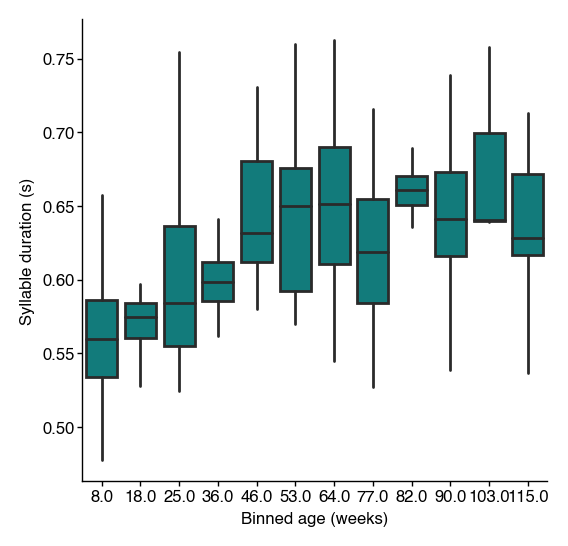

In [15]:
ax = sns.boxplot(
    data=dur_df.reset_index(),
    x="avg_age",
    y="dur",
    showcaps=False,
    showfliers=False,
    color=COLORMAPS.ont_male(255),
)
ax.set(xlabel="Binned age (weeks)", ylabel="Syllable duration (s)")
sns.despine()

## Females

In [16]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/ontogeny_females_syllable_df_v00.parquet')
keep_syllables = np.loadtxt('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/to_keep_syllables_raw.txt', dtype=int)

In [17]:
df['idx'] = np.arange(len(df))
df.loc[df['onsets'], 'dur'] = df.query('onsets')['idx'].diff()
df['dur'] = df['dur'].ffill()
df = df.drop(columns=['idx'])
df=df.query('age<100')

In [18]:
durs = df.groupby(['age', 'mouse'])['dur'].mean() / 30

In [19]:
durs_all = df.groupby(['age', 'mouse','syllables'])['dur'].mean() / 30
durs_all = durs_all.unstack('syllables')
durs_all = durs_all[keep_syllables]

In [20]:
durs = pd.DataFrame(durs_all.mean(axis=1), columns=['dur'])

<Axes: xlabel='age-mouse', ylabel='syllables'>

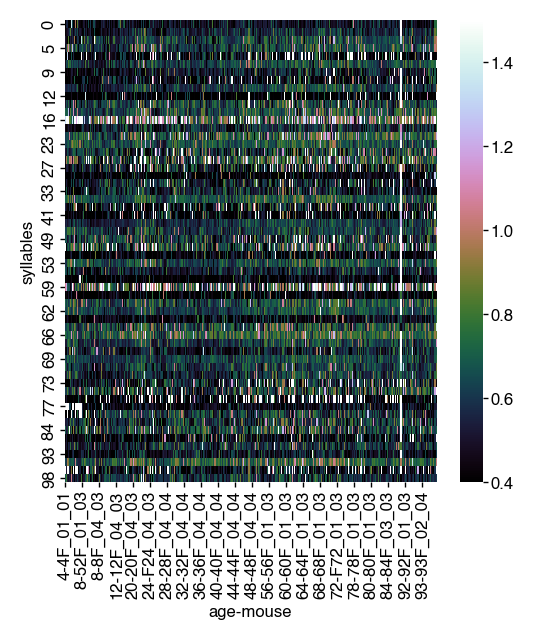

In [21]:
sns.heatmap(durs_all.T, vmin=0.4, vmax=1.5, cmap='cubehelix')

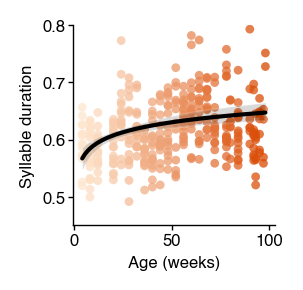

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(1.3,1.3) 
plt.scatter(data=durs.reset_index(),
            x='age', 
            y='dur', 
            s=10, 
            c='age', 
            edgecolor='none',
            linewidth=0.25,
            alpha=0.75,
            cmap=cmf)

ax = sns.regplot(
    data=durs.reset_index(),
    x="age",
    y="dur",
    #color=COLORMAPS.ont_male(255),
    color='black',
    #scatter_kws=dict(linewidths=0),
    scatter=False,
    logx=True,
)
ax.set(xlabel="Age (weeks)", ylabel="Syllable duration", ylim=[0.45,0.8])
sns.despine()

In [23]:
c = PlotConfig()
fig.savefig(c.dana_save_path / "fig1"/ 'syll_duration_female_log.pdf')

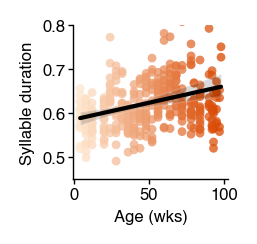

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(1,1) 
plt.scatter(data=durs.reset_index(),
            x='age', 
            y='dur', 
            s=10, 
            c='age', 
            edgecolor='none',
            linewidth=0.25,
            alpha=0.75,
            cmap=cmf)

ax = sns.regplot(
    data=durs.reset_index(),
    x="age",
    y="dur",
    #color=COLORMAPS.ont_male(255),
    color='black',
    #scatter_kws=dict(linewidths=0),
    scatter=False,
    #logx=True,
)
ax.set(xlabel="Age (wks)", ylabel="Syllable duration", ylim=[0.45,0.8])
sns.despine()

In [25]:
c = PlotConfig()
fig.savefig(c.dana_save_path / "fig1"/ 'syll_duration_female_linear.pdf')

In [26]:
dur_df = durs.reset_index()
dur_bins = pd.cut(dur_df['age'], 12, labels=False)
dur_df['bins'] = dur_bins
age_map = dur_df.groupby('bins')['age'].mean()
dur_df['avg_age'] = dur_df['bins'].map(age_map).round(0)

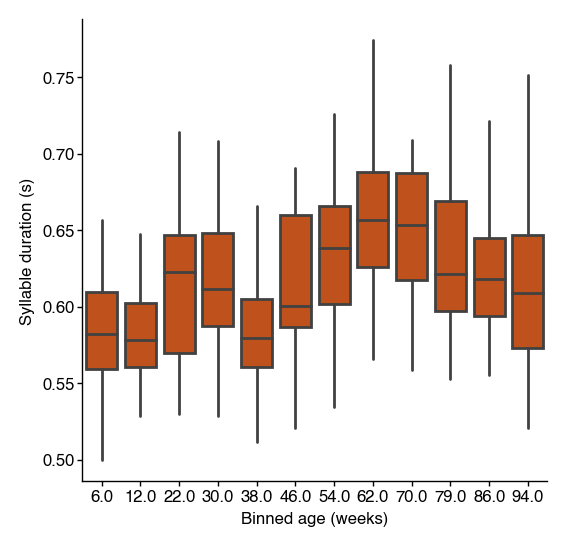

In [27]:
ax = sns.boxplot(
    data=dur_df.reset_index(),
    x="avg_age",
    y="dur",
    showcaps=False,
    showfliers=False,
    color=COLORMAPS.ont_female(255),
)
ax.set(xlabel="Binned age (weeks)", ylabel="Syllable duration (s)")
sns.despine()